# KMeans
- K개의 그룹(중심점을 기준)

https://scikit-learn.org/stable/modules/clustering.html

![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif?20170530143526)



**작동 단계**
1. K개의 중심점 임의 선택
2. 각 데이터 포인트를 가장 가까운 중심점에 할당 > 군집 형성
3. 각 군집의 데이터 포인트 기반으로 새로운 중심점 계산
4. 2~3 단계를 중심점의 변화가 거의 없을 때까지 반복 실행

**장단점**
- 장점
    - 간단한 개념과 구현
    - 빠른 계산 속도
    - 일반적인 군집화에서 가장 많이 활용되며 대용량 데이터에도 활용 가능
- 단점
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도 떨어짐
    - 반복적으로 수행하므로 반복 횟수가 많아지면 수행 시간 느려짐
    - 이상치(outlier) 데이터에 취약
    - 군집이 원형 구조가 아닐 경우 성능 저하 가능성

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,       # 클러스터 개수 (= 중심점 개수)
    init='k-means++',   # 초기 중심점 설정 방식
    max_iter=300,
    random_state=0
)

# 예측을 하는게 아니라 클러스터로 나눔
kmeans.fit(iris.data)
distances = kmeans.transform(iris.data) # 중심점과 거리 계산
distances

array([[3.41251117, 0.14135063, 5.03132789],
       [3.38963991, 0.44763825, 5.08750645],
       [3.56011415, 0.4171091 , 5.25229169],
       [3.412319  , 0.52533799, 5.12704282],
       [3.4603117 , 0.18862662, 5.07638109],
       [3.14251434, 0.67703767, 4.6529179 ],
       [3.50715704, 0.4151867 , 5.18485505],
       [3.32903073, 0.06618157, 4.97466956],
       [3.56110404, 0.80745278, 5.3020706 ],
       [3.34972272, 0.37627118, 5.04034023],
       [3.31978466, 0.4824728 , 4.86909709],
       [3.30275389, 0.25373214, 4.96948678],
       [3.45734945, 0.50077939, 5.1637448 ],
       [3.89486669, 0.91322505, 5.62559662],
       [3.64453145, 1.01409073, 5.07819914],
       [3.49280098, 1.20481534, 4.85660046],
       [3.49087612, 0.6542018 , 5.00219478],
       [3.37762449, 0.1441527 , 4.99534695],
       [3.10971292, 0.82436642, 4.58840834],
       [3.37135761, 0.38933276, 4.94411371],
       [3.06922637, 0.46344363, 4.66670189],
       [3.30868004, 0.3286031 , 4.89580185],
       [3.

In [31]:
kmeans.labels_ # 군집화 결과: 거리가 가까운 곳으로 군집이 됨

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [32]:
iris_df['cluster'] = kmeans.labels_
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [33]:
iris_df.groupby('target')['cluster'].value_counts()

target  cluster
0       1          50
1       0          47
        2           3
2       2          36
        0          14
Name: count, dtype: int64

In [34]:
from sklearn.decomposition import PCA

# 2차원으로 축소 후 각 차원을 df컬럼에 저장
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
iris_df['pca1'] = pca_transformed[:, 0]
iris_df['pca2'] = pca_transformed[:, 1]

In [35]:
# 4차원 공간에 3개 클러스터(꽃종류가 3개)의 중심점을 찍음 -> (3, 4)
print(kmeans.cluster_centers_)

# PCA로 축소된 2차원 공간에 3개의 클러스터의 중심점을 찍음 - > (3, 2)
centers = pca.transform(kmeans.cluster_centers_)
centers

[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


array([[ 0.66567601, -0.3316042 ],
       [-2.64241546,  0.19088505],
       [ 2.34652659,  0.27393856]])

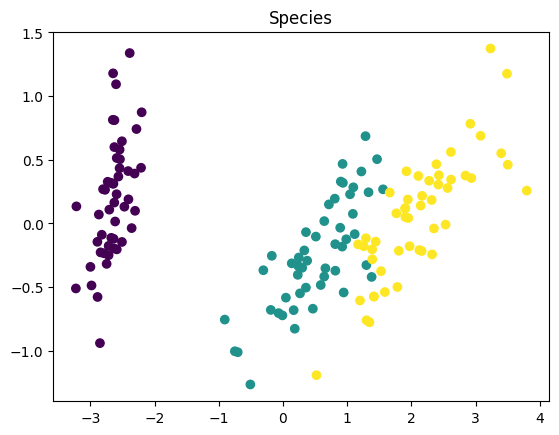

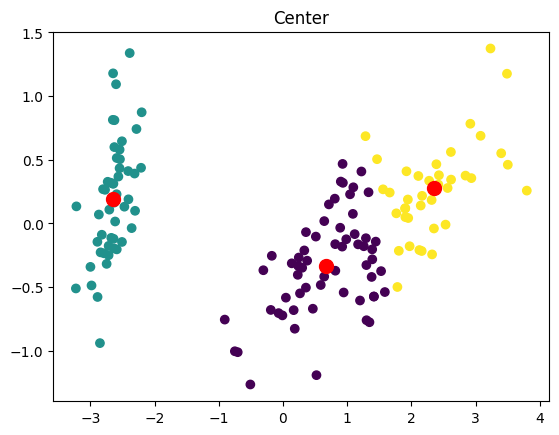

In [36]:
# target(라벨 데이터) 기준 시각화
plt.scatter(x=iris_df['pca1'], 
            y=iris_df['pca2'], 
            c=iris_df['target'])

plt.title('Species')
plt.show()

# cluster(kmeans 군집 데이터) 기준 시각화
plt.scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['cluster'])
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='r', s=100)
plt.title('Center')
plt.show()

In [37]:
fruits = np.load('../../data/fruits_300.npy')
fruits.shape # 300개 이미지 * 100행 * 100열

(300, 100, 100)

In [38]:
# 이미지 시각화 함수
def draw_fruits(arr, ratio=1):
    N = len(arr)
    rows = int(np.ceil(N / 10))
    cols = N if rows < 2 else 10
    fig, ax = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < N:
                ax[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            ax[i, j].axis('off')
    
    plt.show()

In [ ]:
# KMeans 군집 적용을 위한 reshape
fruits_1d = fruits.reshape(-1, 100 * 100)

# KMeans 적용
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(fruits_1d)
kmeans.transform(fruits_1d)

In [40]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))

In [ ]:
draw_fruits(fruits[kmeans.labels_ == 0])
draw_fruits(fruits[kmeans.labels_ == 1])
draw_fruits(fruits[kmeans.labels_ == 2])

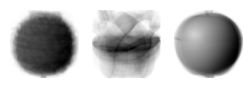

In [42]:
draw_fruits(kmeans.cluster_centers_.reshape(-1, 100, 100))

In [43]:
# 차원축소 후 클러스터링
pca = PCA(n_components=2)
fruits_pca = pca.fit_transform(fruits_1d)
fruits_pca.shape

(300, 2)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(fruits_pca)
kmeans.transform(fruits_pca)

In [45]:
print(np.unique(kmeans.labels_, return_counts=True))


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


[0]


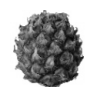

In [48]:
pred = kmeans.predict(fruits_pca[100: 101])
print(pred)
draw_fruits(fruits[100:101])

### 최적의 k 값 찾기
- inertia:  중심점으로부터 각데이터포인트의 분산값
    - 이너셔 값이 작을수록 군집이 잘 돼 있음
- Elbow기법: inertia값이 급격히 감소하는 k값을 최적의 k로 판단

In [49]:
inertias = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fruits_pca)
    inertias.append(kmeans.inertia_)

inertias

[1207702120.596421,
 461196975.9052623,
 322138106.3223897,
 246026281.5865224,
 187383135.5014418,
 152251955.16726786,
 144887656.77295578,
 120809362.61707282,
 108134287.97179157,
 98990243.78492409]

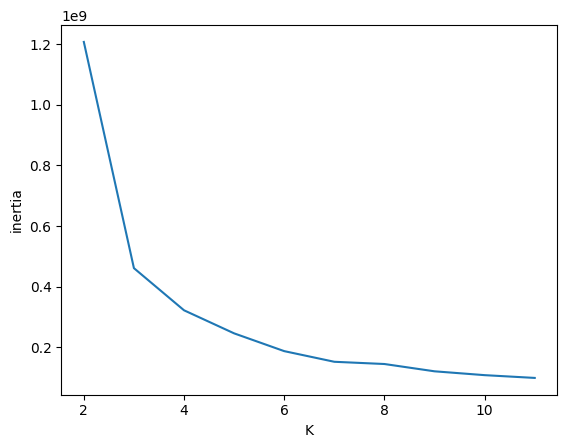

In [50]:
plt.plot(range(2, 12), inertias)
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()